# Projeto

Neste projeto, vamos usar o conceito de entropia e tudo o que analisamos até o momento para fazer um jogador de forca.

1. Vamos instanciar uma classe JogodeForca, que defini logo abaixo. As regras estão no próprio código para não serem ambíguas.
1. O vocabulário permitido é o que está na URL `https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt`, e o jogador pode ter acesso a esse vocabulário.
1. O objetivo da atividade é fazer um jogador automático de forca que ganha o máximo de vezes possível com apenas 5 vidas.
1. Ao criar um novo jogo, o jogador recebe a informação de quantas letras a palavra tem.
1. Em uma jogada típica, o jogador escolhe uma letra. O "juiz" retorna ua lista com os índices em que essa letra aparece na palavra secreta. Se a letra não aparece, retorna uma lista vazia e o jogador perde uma vida.
1. A qualquer momento, o jogador pode consultar suas vidas (`jogo.vidas`), mas, obviamente, não pode consultar a palavra escolhida.
1. O jogador ganha quando, por saber qual palavra foi escolhida, usa o método `tentar_palavra` informando a palavra correta. Se usar o método mas não acertar, perde o jogo imediatamente.
1. Sempre que o jogador ganha o juiz retorna `True`. Quando ele perde, retorna `False`.


## Descrição do projeto

Neste projeto, o grupo deverá projetar e avaliar um jogador de forca. Em sua avaliação, deve executar um número grande de jogos diferentes (no mínimo 100) e então reportar a probabilidade de seu algoritmo vencer o jogo.

Anotações importantes:

1. O grupo deve enviar um link para o repositório GitHub onde está localizado o projeto.
2. No diretório principal do repositório, deve haver um *notebook* comentado `demo.ipynb`, que, quando executado, executa todos os testes que geram os resultados alcançados.
3. Embora haja muitas maneiras de realizar este algoritmo, é obrigatório que sua solução se baseie em conceitos que aprendemos sobre álgebra linear e teoria da informação, isto é, uma ideia que venha deste curso deve obrigatoriamente se o componente central de seu algoritmo.

**ENTREGAS**
* Link para o repositório onde está o projeto.
* No `README.md` do repositório, deve haver um resumo, com até 400 palavras, explicando qual foi a ideia implementada e como o conceito utilizado (que deve obrigatoriamente vir do nosso curso de álgebra linear e teoria da informação) foi usado para resolver o problema.
* O `demo.ipynb` deve estar comentado, célula a célula, em Markdown, explicando em linguagem natural a importância de cada passo e comentanto os resultados da execução de cada célula.
* O `demo.ipynb` deve ser colocado no repositório já executado, isto é, com todos os dados já gerados, de forma que seja possível visualizá-lo inteiramente sem executar as células.
* Importante: seu algoritmo não precisa ganhar sempre, e esta não é uma competição sobre "quem ganha mais". A avaliação está ligada a como você fez a conexão entre a ideia e a solução.

**RUBRICA**

O projeto será avaliado usando três rubricas. [Duas delas dizem respeito à redação e ao código apresentado](rubricas.md), e são compartilhados por todos os projetos. Em especial, a rubrica de *argumentação* será aplicada ao conjundo do `README.md` e das células em markdown do `demo.ipynb`. Este projeto tem ainda requisitos específicos que estão na rubrica abaixo. Os níveis são cumulativos, isto é, para passar de um nível, *todos* os requisitos dele devem ser cumpridos. A nota final é baseada na rubrica em que o trabalho obtiver o *menor* desempenho. As rubricas foram inspiradas nos níveis da [Taxonomia de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/).

| Nível | Descrição | [Tax. de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/) |
| --- | --- | --- |
| F | Não entregue, entregue sem completar o `README.md`, entregue sem o `demo.ipynb`, entregue sem resolver o problema que foi proposto, ou entregue sem usar claramente um conceito que venha do curso de álgebra linear/teoria da informação.  | Não fez |
| E | Entregue, com erros metodológicos graves, como usar um conceito que não tem nenhuma conexão com o problema ou implementá-lo de forma equivocada | Entender |
| D | O projeto tem erros na avaliação de desempenho ou deixa de conectar corretamente e sem equívocos o conceito utilizado à solução proposta. | Compreender |
| B | O projeto avalia corretamente jogador, mas não analisa os principais casos de erros. | Aplicar |
| A | O jogador foi avaliado corretamente, e os principais casos de erro foram explicitados, isto é, o grupo mostra como fazer seu jogador "falhar" e a justificativa dessas falhas. | Analisar |

## Abrindo o arquivo com as palavras

In [4]:
def read_vocabulario():
    with open('vocabulario.txt', 'r') as f:
        vocabulario = f.read().split('\n')
    return vocabulario

## Letras mais frequentes

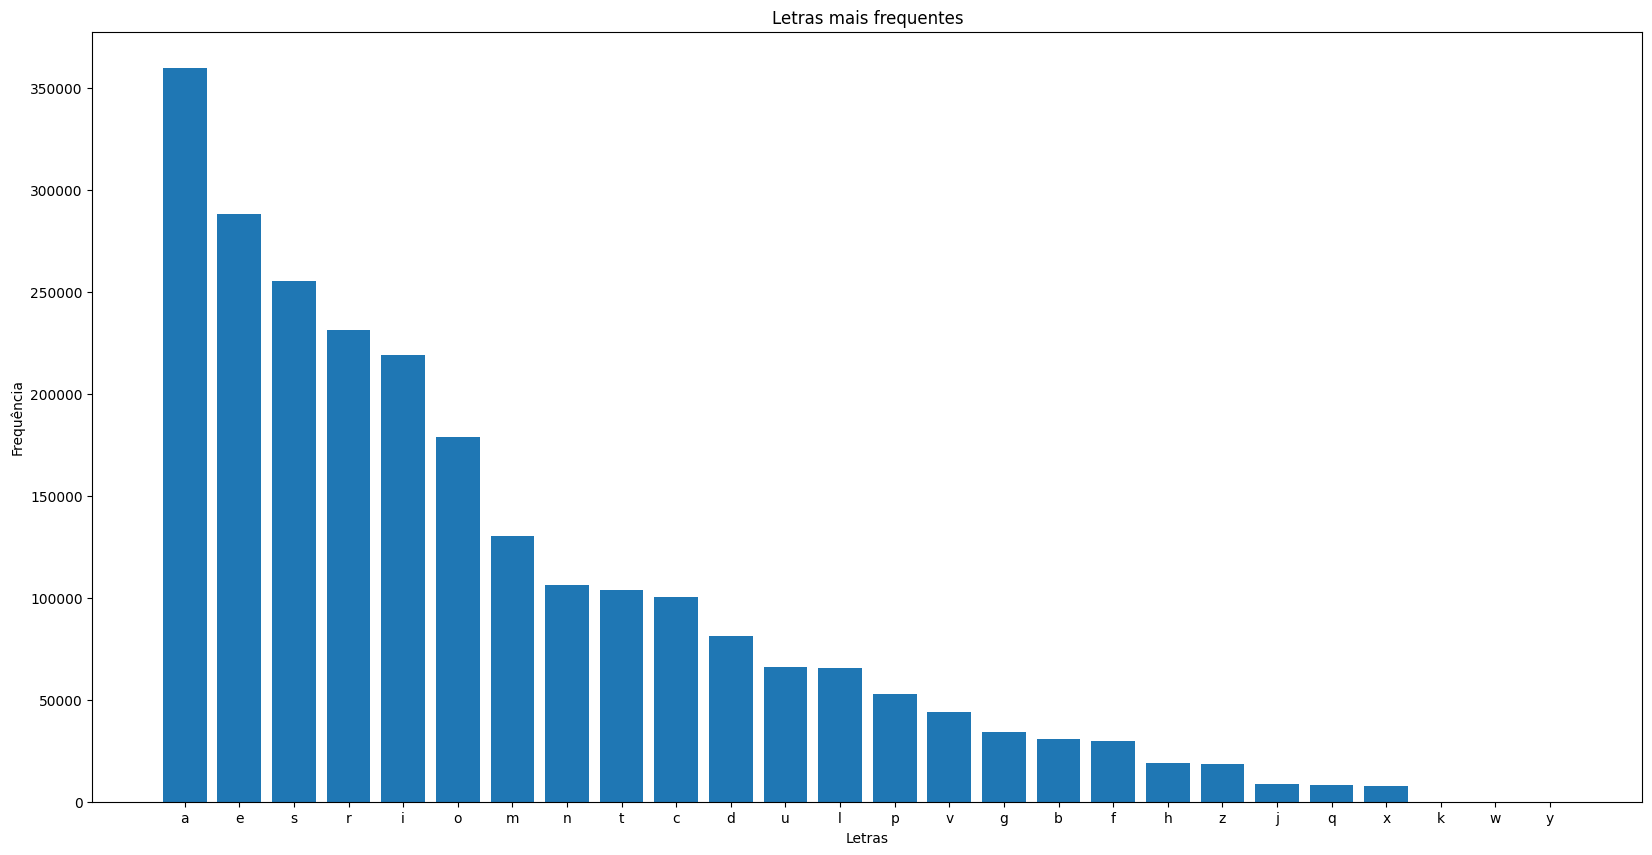

In [18]:
# Verificar as letras mais frequentes
import matplotlib.pyplot as plt

contador_letras = {}
letras = "abcdefghijklmnopqrstuvwxyz"

for palavra in read_vocabulario():
    for letra in palavra:
        if letra in letras:
            if letra in contador_letras:
                contador_letras[letra] += 1
            else:
                contador_letras[letra] = 1

# Ordenar as letras mais frequentes

contador_letras_ordenado = sorted(contador_letras.items(), key=lambda x: x[1], reverse=True)

# Plotar as letras mais frequentes

letras = []
frequencia = []

for i in contador_letras_ordenado:
    letras.append(i[0])
    frequencia.append(i[1])

plt.figure(figsize=(20, 10))
plt.bar(letras, frequencia)
plt.title('Letras mais frequentes')
plt.xlabel('Letras')
plt.ylabel('Frequência')
plt.show()

In [14]:
class JogoDeForca:
    def __init__(self, palavra):
        self.palavra = palavra
        self.letras_erradas = []
        self.letras_certas = []
        self.palavra_descoberta = []
        self.palavra_descoberta.extend('_' * len(palavra))

    def adivinhar(self, letra):
        if letra in self.palavra:
            for i in range(len(self.palavra)):
                if self.palavra[i] == letra:
                    self.palavra_descoberta[i] = letra
            self.letras_certas.append(letra)
            return True
        else:
            self.letras_erradas.append(letra)
            return False

    def enforcou(self):
        return len(self.letras_erradas) == 6

    def acertou(self):
        return '_' not in self.palavra_descoberta

    def terminou(self):
        return self.acertou() or self.enforcou()

    def __str__(self):
        return f'Palavra: {self.palavra_descoberta} \nLetras erradas: {self.letras_erradas} \nLetras certas: {self.letras_certas}'
    